### EDA and Data Cleaning


`1: Load Dataset`
    # Pandas built-in functions
    # Print first and last 5 entries
    # Check size of dataset
    
`2: General Stats about the Dataset`
    # Validating datatypes
    # Checking missing numbers
    # Checking for basic math STATS; Min, Mean, Max, etc

`3: Data Visualizations`
    # Deep dive into specific paramters
    # Visualizing distributions
    
`4: Data Cleaning`
    # Fill-in missing values
    # Checking for duplicates
    
`5: Data Formatting`
    # Data type conversions
    

`Saving Cleaned Dataset As Pickle file`    

#### 0 Import Packages

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

In [2]:
# Embed or show visualizations in notebooks
%matplotlib inline

In [3]:
# Seaborn viz style
sns.set(color_codes=True)

# Seaborn viz color palette
sns.set_palette("tab10")

In [4]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 50)

#### 1 Load Dataset

In [10]:
# Load csv data using pandas
customer_churn = pd.read_csv("./Datasets/Telco-Customer-Churn.csv")

In [11]:
# View the first 5 entries
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


    Observations:
    
    * "customerID" entries are made up of a number and letters; strip these into their own features.
    * Most of the features are categorical features; these should be encoded before modelling.
    * Tenure, MonthlyCharges and TotalCharges are not in the same scale; standardize these features.
    * Output variable entries not encoded.

In [12]:
# View the last 5 entries
customer_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


    Observations:
    
    * "SeniorCitizen" feature already seems to be encoded; convert this back to "No" and "Yes" before 
       visualization.

In [13]:
# Size of DataFrame
customer_churn.shape

(7043, 21)

#### 2 General Stats about the dataset

    Looking at general stats is an important step in the data exploration and data cleaning phase. Stats 
    give us a better sense of or feel of how our data is represented and distributed between individual 
    features and across the entire dataset.
    
    Here, we will be exploring the following: dtypes, missing values, basic stats [max, min, mean, etc]

In [21]:
# DataTypes
pd.DataFrame(data={'dtypes': customer_churn.dtypes})

,dtypes
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


    Observations:
    
    * Features such as gender have the "object" dtype. These features need to be categorical.
    * Total charges dtype is "object"; needs to be of dtype "float" or "Int".

`Missing Values`

    Most machine learning models don't accept data with missing values. Therefore, it's important to make sure
    we diagnose the data we are working with from missing values.
    
    Firstly, it's important to note that missing data can be a result of the following, and beyond:
        * Corrupt data
        * Technical failures during data collection
        * Deliberate action not to provide data
        * And other reasons
        
    When we find entries with missing entries, we can deal with them using the following techniques:
        * Imputation
            - Mean value of entries (numeric features)
            - forward-fill, back-fill, etc (categorical features)
            - Other imputations based on our domain knowledge of the telecommunication sector or industry 
              we are working in.
              
        * Deletion
            - If the entries within a particular column containing missing values are not a lot, we can simply
              delete these entries.
            - If a particular column is missing values in most entries, we can simply delete this column.
            
            Note: We won't delete entries with a lot of missing values; we could lose information in other
                  features.

In [15]:
# Missing Values
pd.DataFrame(data={'Missing Values %': (customer_churn.isna().sum() / customer_churn.shape[0]) * 100})

,Missing Values %
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


    Observations:
    
    * All features are filled in with values; no missing values.

`Basic Stats`

    Calculating basic stats such as mean, std, max, min, etc helps us to study the distribution our data. These
    kind of studies are only applicable to numerical features. 
    
    Note: We can study categorical or textual features through visualizations

In [16]:
# Deal with "SeniorCitizen"
customer_churn['SeniorCitizen'] = customer_churn['SeniorCitizen'].map(lambda x: "No" if x == 0 else "Yes")

In [17]:
# Entries with missing "TotalCharges" values
totalCharges_missing = customer_churn[customer_churn['TotalCharges'].str.startswith(" ")]

In [18]:
totalCharges_missing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
# Helper Function
def rep_as_nan(entry):
    """
    :entry: A value within a particular column in a Dataset
    """
    
    if entry.startswith(' '):
        return np.NaN
    return entry
        

# Represent incorrect entries with np.NaN in "TotalCharges"
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].apply(rep_as_nan)

In [20]:
# Convert "TotalCharges" dtype from "object" to "float"
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'])

In [24]:
customer_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


    Observations:
    
    The features 'tenure', 'MonthCharges' and 'TotalCharges' are not on the same scale. We can observe this
    by looking at the min, mean and max values.
    
        * For example, 'tenure' has min and max values of 0 and 72, respectively. 'TotalCharges' has min and max
        values of 18.8 and 8684, respectively. 
    
    Note: If we model our data using these values, the model will add more weight to TotalCharges over tenure.
    We want to avoid this by scaling the values, so 'tenure' and 'TotalCharges' contribute the same weight.

#### 3 Data Visualizations

    Data visualizations help us to understand and communicate our data using visual forms.
    
    The advantage of using visual forms is that they enable us to quickly study the underlying patterns
    lying in the data; they give an intuition behind what kind of data we are working with.
    
    In Visualizing the Data, we will follow the following structures:
        i. Univeriate Analysis; study our target variable and other features
        ii. Multivariate Analysis; study relationships between other features.

In [25]:
# Customer Churn Values
churn = customer_churn[['customerID', 'Churn']]

In [32]:
def plot_histogram_churn(DataFrame):
    """
    :DataFrame containg features to visualize
    """
    
    # Draw a barplot by Churn
    ax = sns.displot(data=churn, x='Churn', hue='Churn')
    
    plt.title("Churn Distribution by Count") # Title
    plt.ylabel("Count") # Y Label
    plt.xlabel("Churn (No, Yes)") # X Label
    
    ax.legend.set_title("Churn")

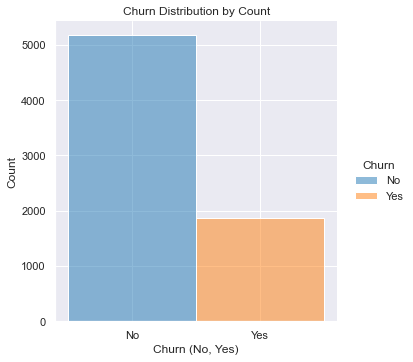

In [33]:
plot_histogram_churn(DataFrame=churn)

    Observation:
    
    * Imbalanced dataset; churn values are not equally represented.
    
    Note: As expected for any business to have a lower percentage of customer who churned, and a higher
          value of those who were retained.

In [41]:
# Group by churn
group_by_churn = churn.groupby("Churn").count()

# Percentage Distribution of Churn
group_by_churn["Churn Distribution (%)"] = (group_by_churn / group_by_churn['customerID'].sum()) * 100
group_by_churn

,customerID,Churn Distribution (%)
Churn,,
No,5174,73.463013
Yes,1869,26.536987


(0.0, 100.0)

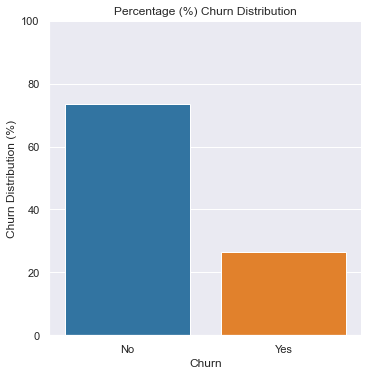

In [60]:
# Draw a barplot by Churn percentage distribution
ax = sns.catplot(
    data=group_by_churn,
    x=group_by_churn.index,
    y='Churn Distribution (%)', 
    kind='bar',
)

plt.title("Percentage (%) Churn Distribution") # Title
plt.ylim(0, 100) # Scaling data y-scale to represent percentage scale

    Observations:
    
    * Roughly, 70+ customers didn't churn, and 20+ customer churned.

`Charges`

In [61]:
# DataFrame of charges and churn
charges = customer_churn[['MonthlyCharges', 'TotalCharges', 'Churn']]

In [62]:
# Mean Monthly and Total Charges by Churn (No and Yes)
charges_groupby = charges.groupby("Churn").mean()

In [63]:
def bar_plot_charges(DataFrame, column_name):
    """
    :DataFrame: Pandas DataFrame
    :column_name: Charges column name contained within DataFrame
    """

    # Draw a barplot
    ax = DataFrame[column_name].plot(kind='bar', color=['#84B0D2', '#F4B47F'])

    ax.set_title("{} by Churn".format(column_name), fontdict={'fontsize': 12})
    ax.set_ylabel(column_name)
    ax.set_xlabel("Churn")

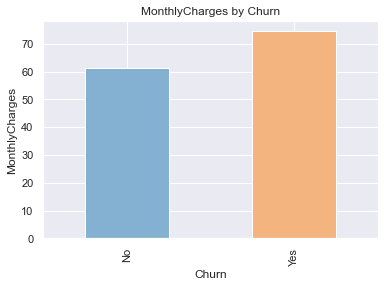

In [64]:
# Mean Monthly Charges by Churn
bar_plot_charges(DataFrame=charges_groupby, column_name='MonthlyCharges')

    Observations:
    
    On avg,
    * customers who churned had monthly charges higher than those who didn't churn.
    * a figure representing roughly 70+ -> churn, and 60+ -> didn't churn.

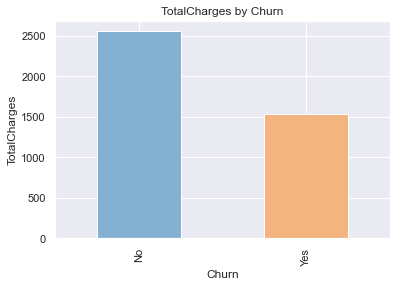

In [65]:
# Mean Monthly Charges by Churn
bar_plot_charges(DataFrame=charges_groupby, column_name='TotalCharges')

    Observations:
    
    On avg,
    * customers who didn't churn paid total charges higher than customer who churned; roughly 75% more.
    
    Note:
    * From further analysis and observations, TotalCharges column was derived from the product of tenure
      and MonthCharges.
    * Due to this, tenure had a significant influence entries within TotalCharges as customer who didn't
      churn stayed much longer.

`Tenure`

In [66]:
# Tenure DataFrame
tenure = customer_churn[['tenure', 'Churn']]

In [67]:
# Tenure grouped by churn
tenure_groupby = tenure.groupby("Churn").mean()

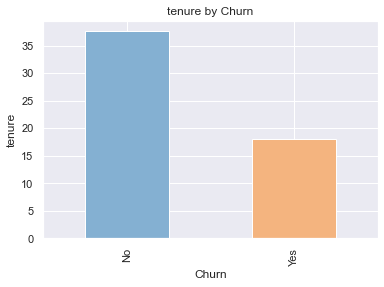

In [68]:
# Mean "tenure" by churn
bar_plot_charges(DataFrame=tenure_groupby, column_name='tenure')

    Observations:
    
    * On avg, tenure was around 17 months for customers who churned and around 37 months for customer who
      didn't churn.

    * Why did customers who churned stay shorter?
    
        i. Observation from Mean Monthly Charges: These customer paid more.

`Demographics`

In [69]:
# DataFrame on demographic information about our customers
demographics = customer_churn[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']]

In [70]:
demographics.head(4)

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,No,Yes,No,No
1,Male,No,No,No,No
2,Male,No,No,No,Yes
3,Male,No,No,No,No


In [71]:
def bar_plot_demographics(DataFrame, hue):
    """
    :DataFrame: A Pandas DataFrame
    :hue: Column with feature to categorise churn by
    """

    # Draw a barplot by Churn by hue
    ax = sns.catplot(
        kind="count",
        data=DataFrame, 
        x='Churn', 
        hue=hue, 
        palette='Set2',
    )
    
    ax.set_titles("Churn Distribution Count by {}".format(hue))
    ax.set_axis_labels("Churn", "Count")
    ax.legend.set_title(hue)

    Observation from below:
    
        i. Gender: If a customer were a female, what's the likelihood that they will churn?
            
            * 50%. We observe an equal count on gender for those who churned.
        
        ii. Senior Citizen: If a customer were a senior citizen, what's the likelihood that they will churn?
        
            * ~25%. For non-senior citizen, the likelihood of churn was much higher.
        
        iii. Partner: If a customer had a partner, what's the likelihood that they will churn?
        
            * Among those who churned, if you don't have a partner, you're more likely to churn.
        
        iv. Dependents: If a customer had dependents, what's the likelihood that they will churn?
        
            * First thoughts... Customer who churned had AVG Monthly Charges higher. Most likely, a customer
              with dependents will churn.
              
            * From analysis... Given our dataset, if have dependents, you're less likely to churn. However, we
              also observe an imbalance in the distribution of dependents; most customers don't have
              dependents.

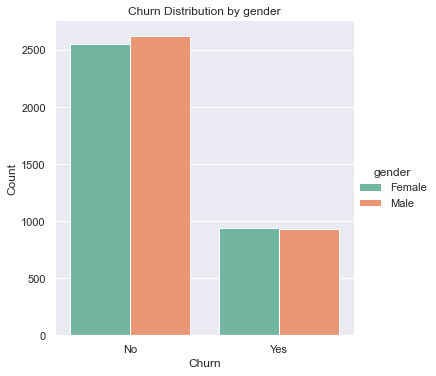

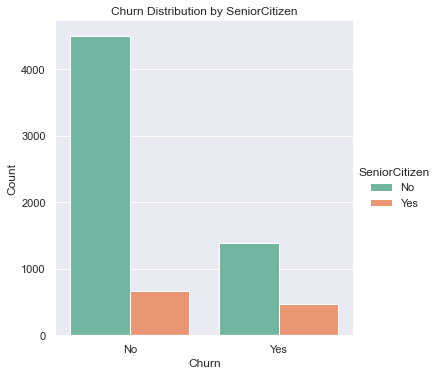

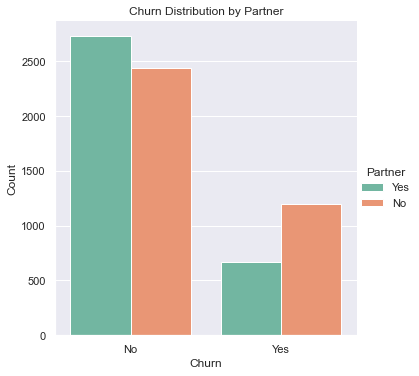

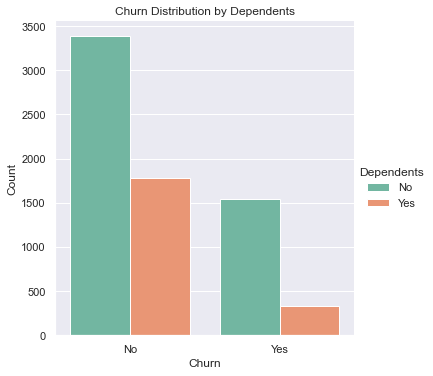

In [74]:
# Loop through all columns in demographics
for col in demographics.columns:
    
    if col != 'Churn':
        bar_plot_demographics(DataFrame=demographics, hue=col)
        plt.title("Churn Distribution by {}".format(col))

`Services`

In [75]:
# DataFrame on services
services = customer_churn[['PhoneService', 'InternetService', \
                           'OnlineSecurity', 'OnlineBackup', \
                           'DeviceProtection', 'TechSupport', 'Churn']]

In [76]:
services.head(4)

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Churn
0,No,DSL,No,Yes,No,No,No
1,Yes,DSL,Yes,No,Yes,No,No
2,Yes,DSL,Yes,Yes,No,No,Yes
3,No,DSL,Yes,No,Yes,Yes,No


    Internet Services

Text(0.5, 1.0, 'Internet Services Options by Count')

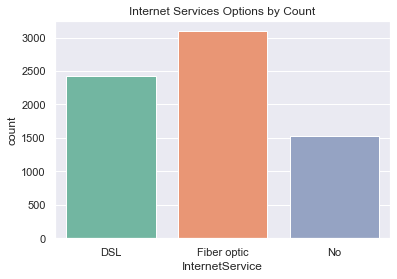

In [80]:
# Internet Services

# Draw a countplot with different Internet Services
ax = sns.countplot(data=services, x='InternetService', palette="Set2")

plt.title("Internet Services Options by Count")

In [81]:
# Internet Services by count
internet_services = pd.DataFrame(data={'Count': services['InternetService'].value_counts()})

In [82]:
# Percentage Count of all Internet Services
internet_services["Count %"] = (internet_services / internet_services['Count'].sum()) * 100

In [83]:
internet_services

,Count,Count %
Fiber optic,3096,43.958540
DSL,2421,34.374556
No,1526,21.666903


Text(0.5, 1.0, '(%) Dist, Internet Services')

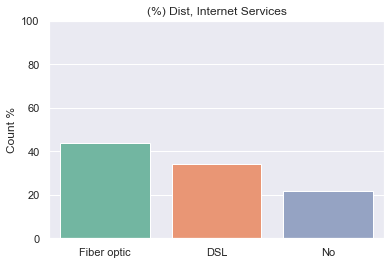

In [87]:
# Draw a countplot with different Internet Services
ax = sns.barplot(data=internet_services, x=internet_services.index, y='Count %', palette="Set2")
plt.ylim(0, 100)
plt.title("(%) Dist, Internet Services")

    Observations:
    
    * Nealy 44% of customers subscribed to Fiber Optic and 34% to DSL.
    * And nearly 21% were not subscribed to any Internet Service

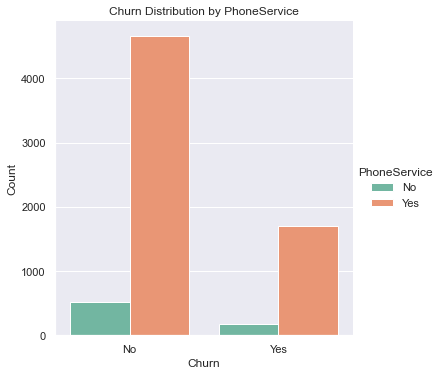

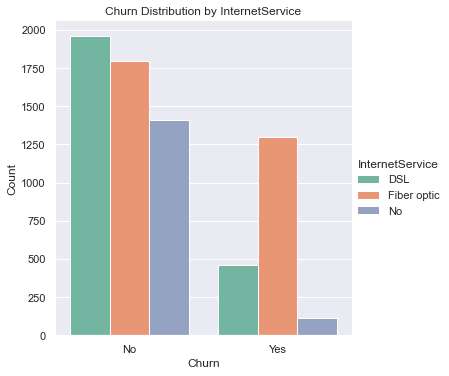

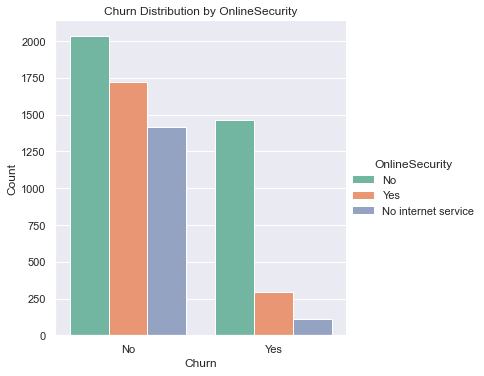

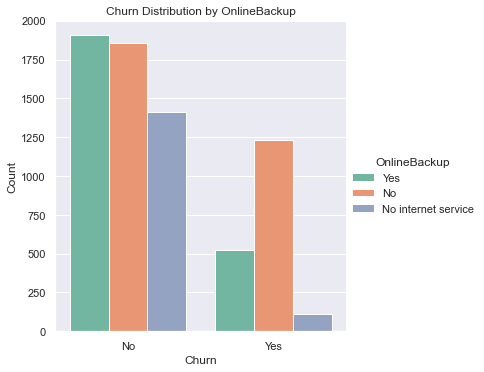

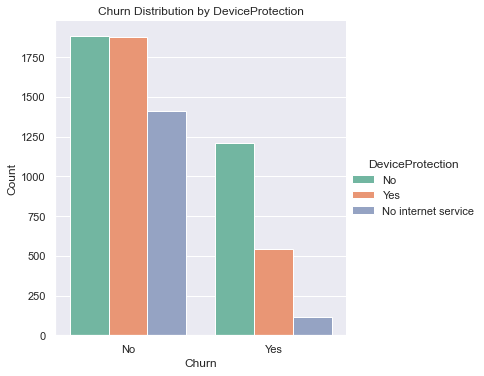

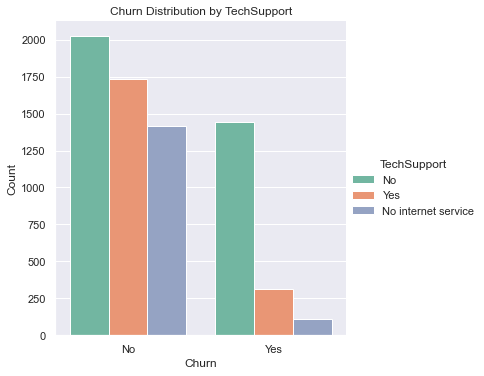

In [89]:
# Loop through all columns in services
for col in services.columns:
    
    if col != 'Churn':
        bar_plot_demographics(DataFrame=services, hue=col)
        plt.title("Churn Distribution by {}".format(col))

    Observations:
    
    General observation...
    
    * If a customer has no Internet Subscription, they are less likely to churn.
    * If a customer has Internet Subscription and they not subscibed to a services, they are most likely to
      churn.
    
    i. Phone Service: Likelihood of a customer to churn if they had Phone Services
    
        * First Thoughts... We expect most customer to have phone services
        * In comparision to customers who didn't churn, Phone Services had no influence on churn.
        
    ii. Internet Services: Likelihood of a customer to churn per Internet Services
    
        * Customers subscribed to Fiber Optic are most likely to churn.
        * Interestingly, if a customer has no Internet Subscription, they not likely to churn.
        
    iii. Online Security: Likelihood of a customer to churn per Online Security Services
    
        * If a customer not subscribed for Online Security, they are most likely to churn.
        * Thoughts to this... Maybe Online Security is expensive and they are most likely prone
          to a security breach without this subscription.
        
    iv. Online Backup: Likelihood of a customer to churn per services
    
        * Customers not subscribed to Online Backup services are most likely to churn.
        
    v and vi. Device Protection & Tech Support: Likelihood of a customer to churn
    
        * Customers not subscribed to these services are most likely to churn.

`Contract and Payments`

In [92]:
# DataFrame with contract and payment features
payment = customer_churn[['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [93]:
payment.head(5)

,Contract,PaperlessBilling,PaymentMethod,Churn
0,Month-to-month,Yes,Electronic check,No
1,One year,No,Mailed check,No
2,Month-to-month,Yes,Mailed check,Yes
3,One year,No,Bank transfer (automatic),No
4,Month-to-month,Yes,Electronic check,Yes


    Contract and Payment Method Distributions

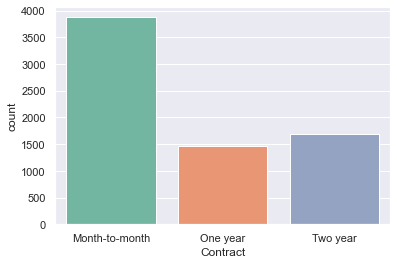

In [94]:
# Draw a countplot for Constract Distribution
ax = sns.countplot(data=payment, x='Contract', palette="Set2")

In [95]:
# Contract Counts
contract = pd.DataFrame(data={'Count': payment['Contract'].value_counts()})

# Contract Counts by Percent
contract['Contract Count %'] = (contract['Count'] / contract['Count'].sum()) * 100

contract

,Count,Contract Count %
Month-to-month,3875,55.019168
Two year,1695,24.066449
One year,1473,20.914383


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

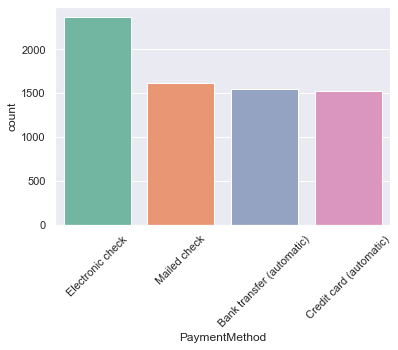

In [96]:
# Draw a countplot for Constract Distribution
ax = sns.countplot(data=payment, x='PaymentMethod', palette="Set2")

plt.xticks(rotation=45)

In [97]:
# Contract Counts
pay_method = pd.DataFrame(data={'Count': payment['PaymentMethod'].value_counts()})

# Contract Counts by Percent
pay_method['Pay-Method Count %'] = (pay_method['Count'] / pay_method['Count'].sum()) * 100

pay_method

,Count,Pay-Method Count %
Electronic check,2365,33.579441
Mailed check,1612,22.887974
Bank transfer (automatic),1544,21.922476
Credit card (automatic),1522,21.610109


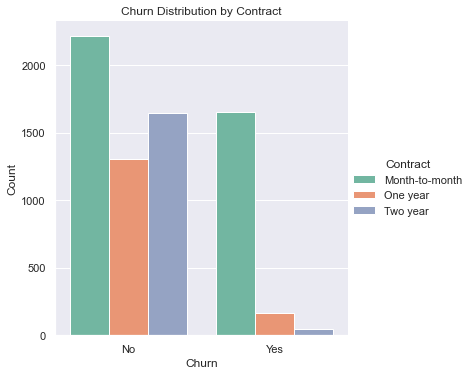

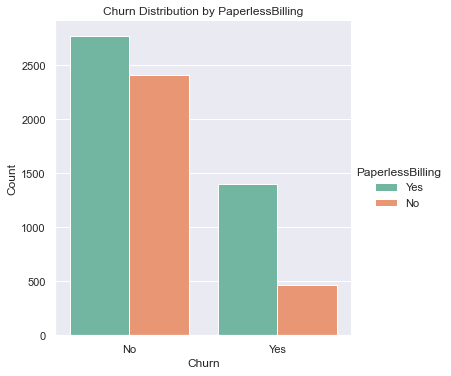

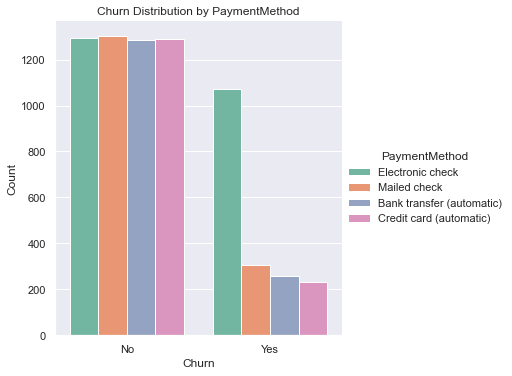

In [99]:
# Loop through all columns in payment
for col in payment.columns:
    
    if col != 'Churn':
        bar_plot_demographics(DataFrame=payment, hue=col)
        plt.title("Churn Distribution by {}".format(col))

    Observations:
    
    i. Contract: Likelihood to churn per contract type
    
        * Customers on a Month-to-Month contract are most likely to churn. From analysis above, avg tenure was
          nearly 15months. As expected, customer with Two-Year contracts far less likely to churn.
          
    ii. Paperless Billing: Likelihood to churn given Paperless Bill
    
        * Customers with Paperless Bills are most likely to churn.
        
    iii. Payment Method:
    
        * Customer with Electronic Checks are more likely to churn. However, the distribution nearly follows
          with that of Payment Methods made above.

`Other Services`

In [100]:
# DataFrame with columns of other services
other_services = customer_churn[['MultipleLines', 'StreamingTV', 'StreamingMovies', 'Churn']]

In [101]:
other_services.head()

,MultipleLines,StreamingTV,StreamingMovies,Churn
0,No phone service,No,No,No
1,No,No,No,No
2,No,No,No,Yes
3,No phone service,No,No,No
4,No,No,No,Yes


    Multiple Lines Distribution

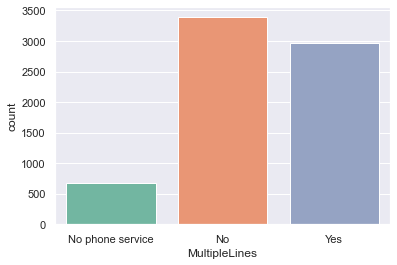

In [102]:
# Draw a countplot for Constract Distribution
ax = sns.countplot(data=other_services, x='MultipleLines', palette="Set2")

In [103]:
# Multiple Lines Count
multiple_lines = pd.DataFrame(data={'Count': other_services['MultipleLines'].value_counts()})

# Contract Counts by Percent
multiple_lines['Multiple Lines Count %'] = (multiple_lines['Count'] / multiple_lines['Count'].sum()) * 100

multiple_lines

,Count,Multiple Lines Count %
No,3390,48.132898
Yes,2971,42.183729
No phone service,682,9.683374


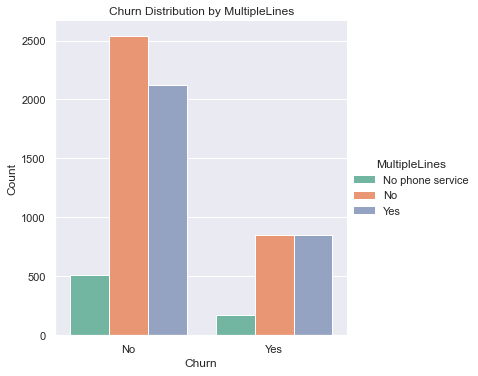

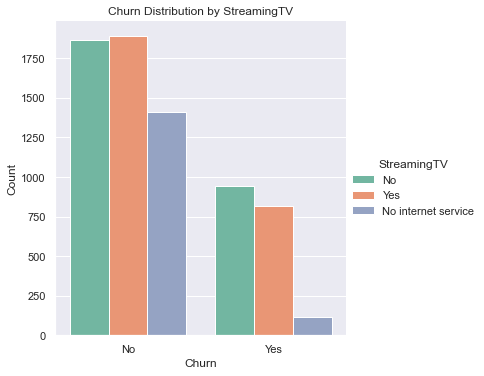

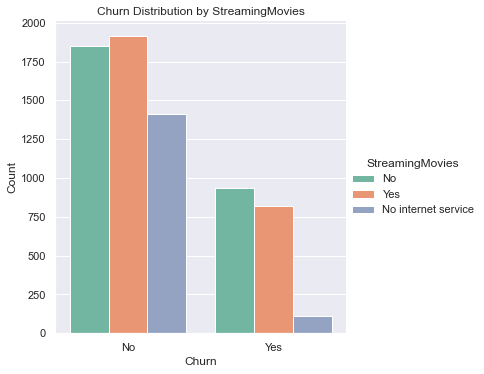

In [105]:
# Loop through all columns in payment
for col in other_services.columns:
    
    if col != 'Churn':
        bar_plot_demographics(DataFrame=other_services, hue=col)
        plt.title("Churn Distribution by {}".format(col))

    Observations:
    
    i. StreamingTV & StreamingMovies: Likelihood of customer to churn
        
        * Customers are most likely to churn if they have an internet subscription regardless of whether they
          are subscribed for Streaming services or not.
        
    ii. Multiple Lines: Likelihoo of customer to churn
        
        * Customers are most likely to churn if they have phone services regardless on whether they have
          multiple lines or not.

`Boxplots`

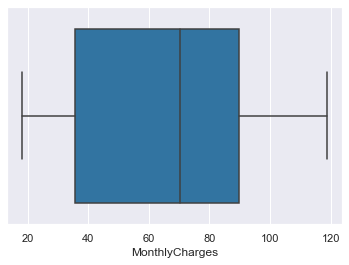

In [106]:
# Monthly Charges
ax = sns.boxplot(x=charges['MonthlyCharges'])

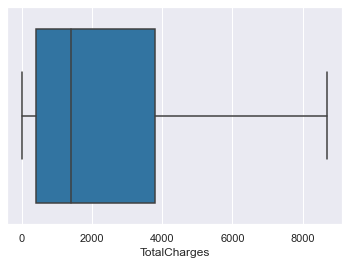

In [107]:
# Total Charges
ax = sns.boxplot(x=charges['TotalCharges'])

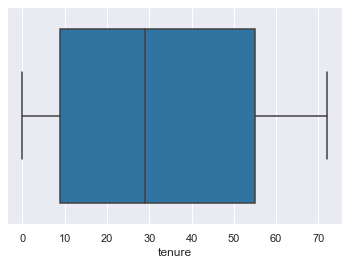

In [108]:
# Tenure
ax = sns.boxplot(x=tenure['tenure'])

`Correlation`

In [109]:
# Correlation
corr = customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

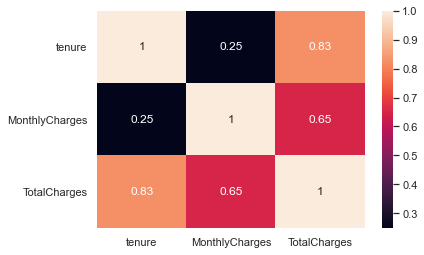

In [112]:
# Draw correlation heatmap
ax = sns.heatmap(corr, annot=True)

    * Tenure and Total Charges are very correlated

#### 4 Data Cleaning

    Missing Values

In [113]:
# Missing Values
missing_vals = pd.DataFrame(data={'Missing Values %': (customer_churn.isna().sum() / customer_churn.shape[0]) * 100})

In [114]:
missing_vals

,Missing Values %
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [306]:
# Impute missing values using mean; Total Charges

tot_chgs_mean = customer_churn['TotalCharges'].mean()

customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna(value=tot_chgs_mean, axis=0)

In [310]:
# Checking if dataset has duplicated entries
customer_churn[customer_churn.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### 5 Data Formatting

In [313]:
# Make all feature categorical except "customerID", and all numerical features

# Loop through all features
for col in customer_churn.columns:
    
    if col not in ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']:
        customer_churn[col] = customer_churn[col].astype('category')

In [316]:
import pickle

# Exporting dataset as pickle; to return state of dataset
with open('cleaned_data.pickle', 'wb') as f:
    pickle.dump(customer_churn, f)

`Notes:`

* If a customer churned, they were paying more than those who didn't churn, on avg.
* If a customer churned, they remained a customer for half the time of those who didn't churn, on avg.

In [23]:
# NOTES

# -> Expand more information on Boxplots for "Tenure", "MonthlyCharges" and "TotalCharges"


# -> Exploration
    # Churn, Senior Citizen... AVG Monthy Charges
    # Churn, Partnet... AVG Monthly Charges

# -> Data Cleaning
# Convert dtype to appropriate ones
# 

# -> ACT ON FIRST

# -> ACT ON LATER
# Scale "Tenure", "MonthlyCharges" and "TotalCharges"
# Encode all other features except "customerID"
# Split "customerID" into two features; num and letters
# Make churn barplot a stacked plot;